In [1]:
! [ -e /content ] && pip install -Uqq fastai

     |████████████████████████████████| 194kB 9.3MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 


In [2]:

from fastai.vision.all import *

In [3]:
path = untar_data(URLs.MNIST_SAMPLE)

In [4]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/valid')]

In [5]:
(path/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/3'),Path('/root/.fastai/data/mnist_sample/train/7')]

In [6]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

In [7]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [8]:
tensor(im3) [4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [9]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(i)) for i in threes]

In [10]:
len(three_tensors),len(seven_tensors)

(6131, 6265)

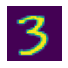

In [11]:
show_image(three_tensors[1])

In [12]:
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_sevens.shape

torch.Size([6265, 28, 28])

In [13]:
mean3 = stacked_threes.mean(0)
mean7 = stacked_sevens.mean(0)
mean3

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 7.2918e-05, 1.9637e-04,
         2.3410e-04, 1.9253e-04, 2.7568e-04, 2.6161e-04, 2.9423e-04, 2.840

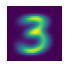

In [14]:
show_image(mean3)

In [15]:
a_3 = stacked_threes[1]
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_sqr

tensor(0.2021)

In [16]:
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_sqr

tensor(0.3021)

In [17]:
val_threes = (path/'valid'/'3').ls().sorted()
val_sevens = (path/'valid'/'7').ls().sorted()
valid3_tens = [tensor(Image.open(o)) for o in val_threes]
valid7_tens = [tensor(Image.open(o)) for o in val_sevens]                 

In [18]:
valid3 = torch.stack(valid3_tens).float()/255
valid7 = torch.stack(valid7_tens).float()/255
valid3.shape,valid7.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [19]:
def mnist_distance(a,b): return (a - b).abs().mean((-1,-2))
mnist_distance(a_3,mean3)

tensor(0.1114)

In [20]:
valid3_dist = mnist_distance(valid3,mean3)
valid7_dist = mnist_distance(valid7,mean3)
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

In [22]:
accuracy_3s = is_3(valid3).float().mean()
accuracy_7s = (1-is_3(valid7).float()).mean()
accuracy_3s,accuracy_7s,(accuracy_7s + accuracy_3s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))